In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weatherdata.csv')
df

,Outlook,Temperature,Humidity,Wind,Answer
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


In [3]:
df_encoded = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])

from sklearn.model_selection import train_test_split
X = df_encoded.drop('Answer', axis=1)
y = df_encoded['Answer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,Outlook_overcast,Outlook_rain,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Wind_strong,Wind_weak
13,0,1,0,0,0,1,1,0,1,0
11,1,0,0,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1
2,1,0,0,0,1,0,1,0,0,1
15,0,0,1,0,0,1,0,1,1,0
4,0,1,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,0,1
10,0,0,1,0,0,1,0,1,1,0
12,1,0,0,0,1,0,0,1,0,1


Accuracy: 0.5


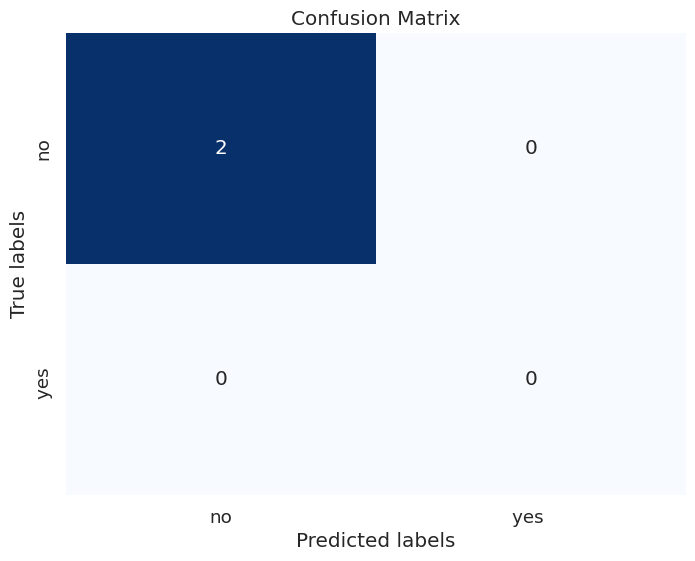

In [4]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# K-NN implementation
def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_sample in X_test.values:
        distances = [euclidean_distance(test_sample, x_train) for x_train in X_train.values]
        nearest_neighbors = np.argsort(distances)[:k]
        neighbor_labels = [y_train.iloc[i] for i in nearest_neighbors]
        y_pred.append(max(set(neighbor_labels), key=neighbor_labels.count))
    return np.array(y_pred)

# Testing different values of K
def test_k_values(X_train, y_train, X_test, y_test, k_values):
    accuracies = []
    for k in k_values:
        y_pred = knn_predict(X_train, y_train, X_test, k)
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        accuracies.append(accuracy)
    return accuracies

# Calculating confusion matrix and accuracy
k_values = range(1, 21)  # Trying K values from 1 to 20
accuracies = test_k_values(X_train, y_train, X_test, y_test, k_values)
optimal_k = k_values[np.argmax(accuracies)]
y_pred_optimal = knn_predict(X_train, y_train, X_test, optimal_k)

# Confusion matrix
def confusion_matrix(y_true, y_pred):
    classes = np.unique(y_true)
    num_classes = len(classes)
    conf_matrix = np.zeros((num_classes, num_classes))
    for i in range(num_classes):
        true_indices = np.where(y_true == classes[i])
        pred_classes = y_pred[true_indices]
        for j in range(num_classes):
            conf_matrix[i, j] = np.sum(pred_classes == classes[j])
    return conf_matrix

# Plotting confusion matrix
def plot_confusion_matrix(conf_mat, classes):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Calculating confusion matrix
conf_mat = confusion_matrix(y_test.values, y_pred_optimal)

# Calculate accuracy
accuracy = np.sum(y_test == y_pred_optimal) / len(y_test)
print("Accuracy:", accuracy)

# Plotting the confusion matrix
plot_confusion_matrix(conf_mat, np.unique(y_test))

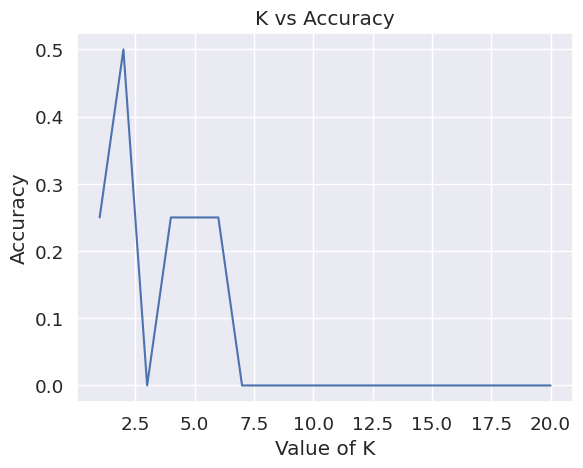

Optimal Value of K for maximum accuracy: 2


In [5]:
k_values = range(1, 21)
accuracies = test_k_values(X_train, y_train, X_test, y_test, k_values)

# Plotting k vs accuracy curve
plt.plot(k_values, accuracies)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()

# Finding the value of k for maximum accuracy
optimal_k = k_values[np.argmax(accuracies)]
print("Optimal Value of K for maximum accuracy:", optimal_k)

# Predicting using the optimal K
y_pred_optimal = knn_predict(X_train, y_train, X_test, optimal_k)